In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Fifa_world_cup.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Position         128 non-null    int64 
 1   Team             128 non-null    object
 2   Games Played     128 non-null    int64 
 3   Win              128 non-null    int64 
 4   Draw             128 non-null    int64 
 5   Loss             128 non-null    int64 
 6   Goals For        128 non-null    int64 
 7   Goals Against    128 non-null    int64 
 8   Goal Difference  128 non-null    int64 
 9   Points           128 non-null    int64 
 10  year             128 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 11.1+ KB


In [4]:
df.describe()

,Position,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,year
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,16.500000,4.000000,1.593750,0.812500,1.593750,5.132812,5.132812,0.000000,5.593750,2016.000000
std,9.269372,1.328074,1.584559,0.801082,0.714721,3.943241,2.315205,4.186593,4.737915,4.489708
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-11.000000,0.000000,2010.000000
25%,8.750000,3.000000,1.000000,0.000000,1.000000,2.000000,3.000000,-3.000000,3.000000,2013.000000
50%,16.500000,3.500000,1.000000,1.000000,2.000000,4.000000,5.000000,-1.000000,4.000000,2016.000000
75%,24.250000,4.250000,2.000000,1.000000,2.000000,6.000000,6.250000,2.000000,7.000000,2019.000000
max,32.000000,7.000000,6.000000,3.000000,3.000000,18.000000,14.000000,14.000000,19.000000,2022.000000


In [5]:
df.head()

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,year
0,1,Argentina,7,6,0,1,15,8,7,18,2022
1,2,France,7,5,0,2,16,8,8,15,2022
2,3,Croatia,7,4,2,1,8,7,1,14,2022
3,4,Morocco,7,4,1,2,6,5,1,13,2022
4,5,England,5,3,1,1,13,4,9,10,2022


In [6]:
print(df.columns)

Index(['Position', 'Team', 'Games Played', 'Win', 'Draw', 'Loss', 'Goals For',
       'Goals Against', 'Goal Difference', 'Points', 'year'],
      dtype='object')


In [7]:
df = df.drop('Position', axis=1)

In [8]:
print(df.columns)

Index(['Team', 'Games Played', 'Win', 'Draw', 'Loss', 'Goals For',
       'Goals Against', 'Goal Difference', 'Points', 'year'],
      dtype='object')


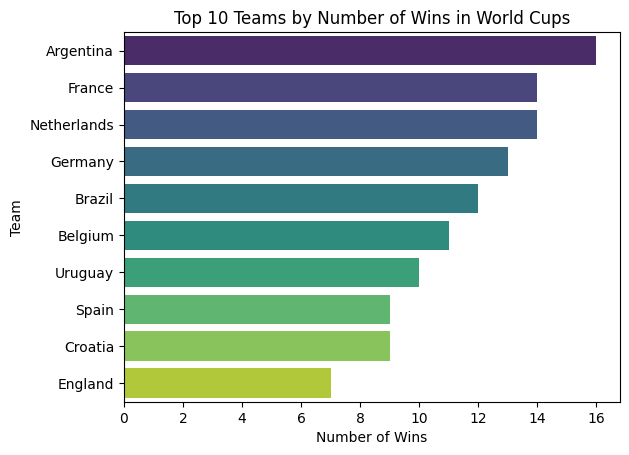

In [11]:
# Top 10 teams by number of wins
top_winning_teams = df.groupby('Team')['Win'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_winning_teams.values, y=top_winning_teams.index, hue=top_winning_teams.index, palette='viridis', legend=False)
plt.title('Top 10 Teams by Number of Wins in World Cups')
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.show()

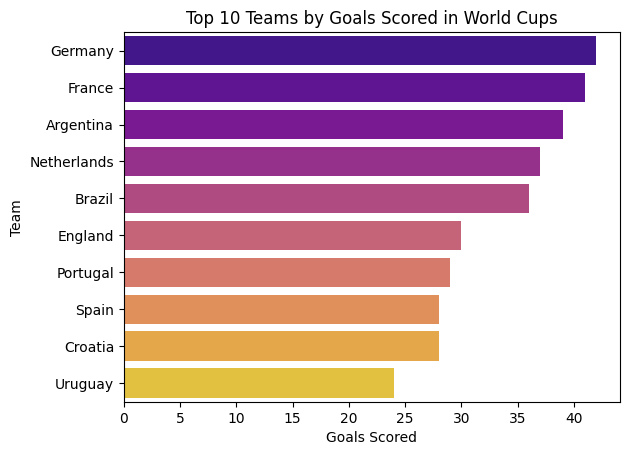

In [13]:
# Top 10 teams by goals scored
top_scoring_teams = df.groupby('Team')['Goals For'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_scoring_teams.values, y=top_scoring_teams.index, hue =top_scoring_teams.index, palette='plasma', legend= False)
plt.title('Top 10 Teams by Goals Scored in World Cups')
plt.xlabel('Goals Scored')
plt.ylabel('Team')
plt.show()

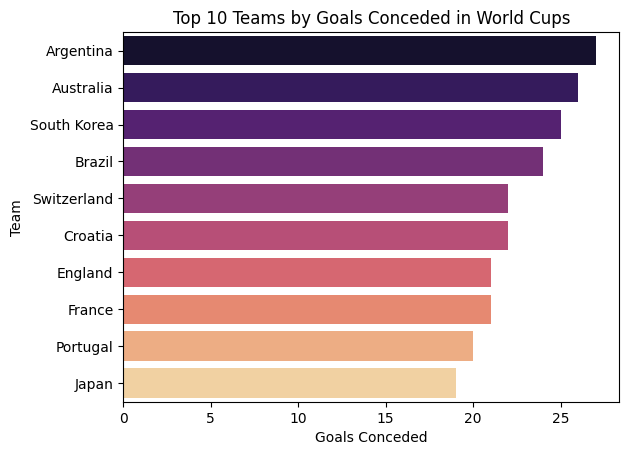

In [14]:
# Top 10 teams by goals conceded
top_conceding_teams = df.groupby('Team')['Goals Against'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_conceding_teams.values, y=top_conceding_teams.index, hue=top_conceding_teams.index, palette='magma',legend=False)
plt.title('Top 10 Teams by Goals Conceded in World Cups')
plt.xlabel('Goals Conceded')
plt.ylabel('Team')
plt.show()

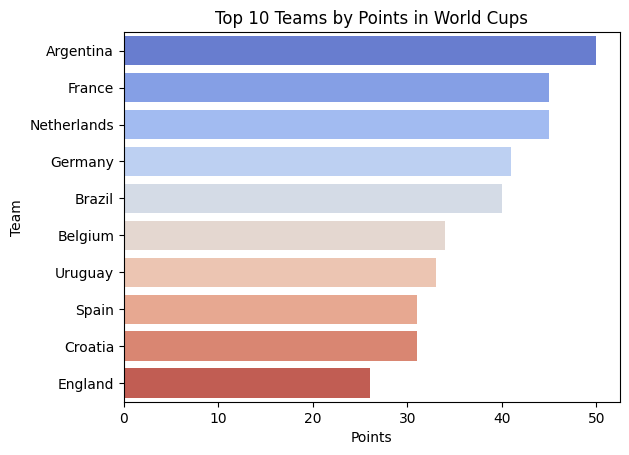

In [16]:
# Top 10 teams by points
top_teams_by_points = df.groupby('Team')['Points'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_teams_by_points.values, y=top_teams_by_points.index, hue=top_teams_by_points.index, palette='coolwarm', legend=False)
plt.title('Top 10 Teams by Points in World Cups')
plt.xlabel('Points')
plt.ylabel('Team')
plt.show()

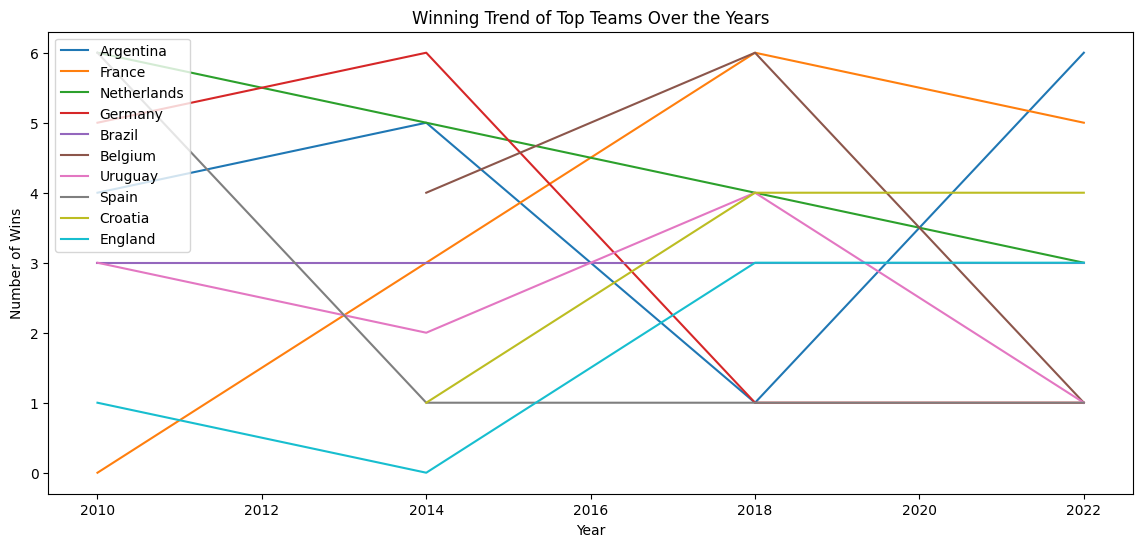

In [20]:
# Plotting wins over the years for the top teams
top_teams = top_winning_teams.index
plt.figure(figsize=(14, 6))
for team in top_teams:
    team_data = df[df['Team'] == team]
    sns.lineplot(x=team_data['year'], y=team_data['Win'], label=team)

plt.title('Winning Trend of Top Teams Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.legend(loc='upper left')
plt.show()

In [28]:
grouped_data = df.groupby('year')

In [32]:
# Find the best team for each edition based on Points
best_teams = grouped_data.apply(lambda x: x.loc[x['Points'].idxmax()], include_groups=False)

best_teams = best_teams[['Team', 'Points', 'Win', 'Draw', 'Loss', 'Goals For', 'Goals Against']]
print(best_teams)

           Team  Points  Win  Draw  Loss  Goals For  Goals Against
year                                                              
2010      Spain      18    6     0     1          8              2
2014    Germany      19    6     1     0         18              4
2018     France      19    6     1     0         14              6
2022  Argentina      18    6     0     1         15              8


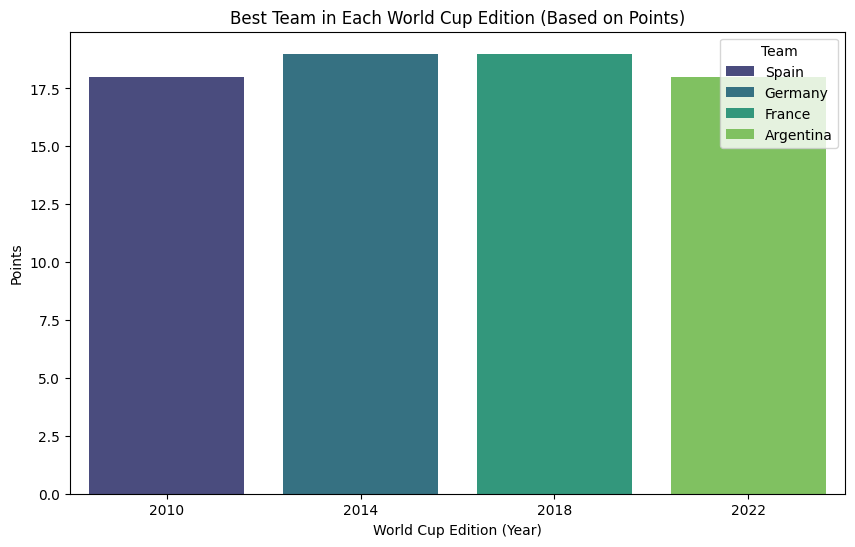

In [33]:
# Plot the performance of the best team in each edition
plt.figure(figsize=(10, 6))
sns.barplot(data=best_teams, x='year', y='Points', hue='Team', dodge=False, palette='viridis')
plt.title('Best Team in Each World Cup Edition (Based on Points)')
plt.xlabel('World Cup Edition (Year)')
plt.ylabel('Points')
plt.show()

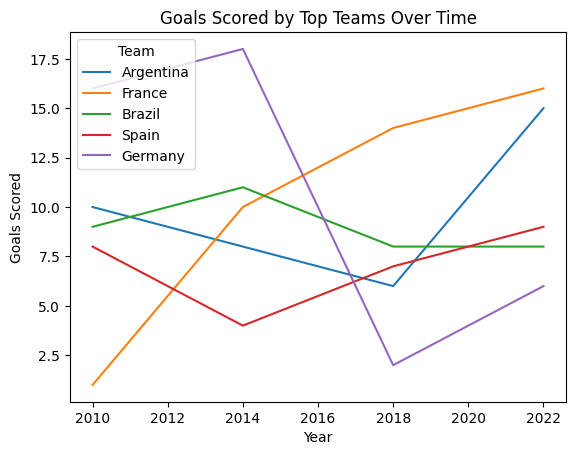

In [37]:
top_teams = df[df['Team'].isin(['Brazil', 'Germany', 'Argentina', 'France', 'Spain'])]

sns.lineplot(x='year', y='Goals For', hue='Team', data=top_teams)
plt.title('Goals Scored by Top Teams Over Time')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.show()

In [40]:
editions = [2010, 2014, 2018, 2022]
filtered_df = df[df['year'].isin(editions)]

In [41]:
# Pivot the data
pivot_df = filtered_df.pivot_table(index='Team', columns='year', values='Points')
pivot_df['Points_Change'] = pivot_df[2022] - pivot_df[[2010, 2014, 2018]].max(axis=1)
# Sort teams by their improvement
top_underdogs = pivot_df.sort_values(by='Points_Change', ascending=False).head(4)
print(top_underdogs)

year       2010  2014  2018  2022  Points_Change
Team                                            
Morocco     NaN   NaN   1.0  13.0           12.0
Cameroon    0.0   0.0   NaN   4.0            4.0
Portugal    5.0   4.0   5.0   9.0            4.0
Argentina  12.0  16.0   4.0  18.0            2.0


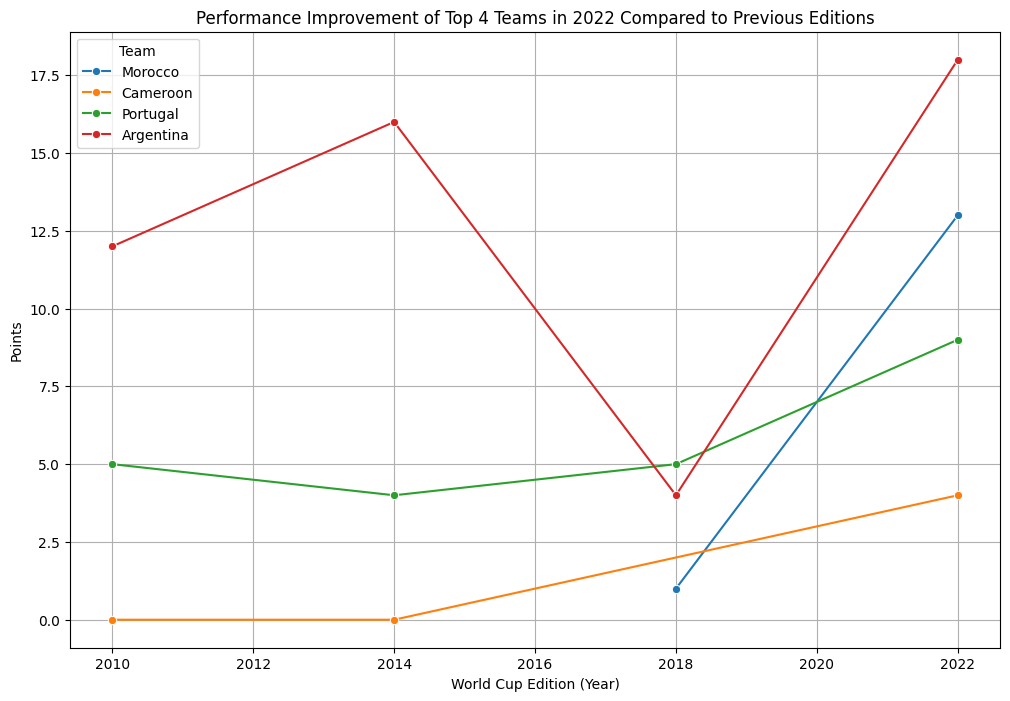

In [43]:
# Reset index
top_underdogs = top_underdogs.reset_index()

# Melt the dataframe
melted_df = pd.melt(top_underdogs, id_vars=['Team'], value_vars=[2010, 2014, 2018, 2022], var_name='Year', value_name='Points')

plt.figure(figsize=(12, 8))
sns.lineplot(data=melted_df, x='Year', y='Points', hue='Team', marker='o', palette='tab10')
plt.title('Performance Improvement of Top 4 Teams in 2022 Compared to Previous Editions')
plt.xlabel('World Cup Edition (Year)')
plt.ylabel('Points')
plt.legend(title='Team')
plt.grid(True)
plt.show()